In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from os import listdir
from os.path import isfile, join

# CHECK : Self and multi edged verticies

In [65]:
path="./experiment_3/"
fichiers = [f for f in listdir(path) if isfile(join(path, f))]
print(np.sort(fichiers))

['N_sample1000_N10000_p0.1.npy' 'N_sample1000_N10000_p0.2.npy'
 'N_sample1000_N10000_p0.3.npy' 'N_sample1000_N10000_p0.4.npy'
 'N_sample1000_N10000_p0.5.npy' 'N_sample1000_N10000_p0.6.npy'
 'N_sample1000_N10000_p0.7.npy' 'N_sample1000_N10000_p0.8.npy'
 'N_sample1000_N10000_p0.9.npy' 'N_sample1000_N1000_p0.1.npy'
 'N_sample1000_N1000_p0.2.npy' 'N_sample1000_N1000_p0.3.npy'
 'N_sample1000_N1000_p0.4.npy' 'N_sample1000_N1000_p0.5.npy'
 'N_sample1000_N1000_p0.6.npy' 'N_sample1000_N1000_p0.7.npy'
 'N_sample1000_N1000_p0.8.npy' 'N_sample1000_N1000_p0.9.npy'
 'N_sample1000_N100_p0.1.npy' 'N_sample1000_N100_p0.2.npy'
 'N_sample1000_N100_p0.3.npy' 'N_sample1000_N100_p0.4.npy'
 'N_sample1000_N100_p0.5.npy' 'N_sample1000_N100_p0.6.npy'
 'N_sample1000_N100_p0.7.npy' 'N_sample1000_N100_p0.8.npy'
 'N_sample1000_N100_p0.9.npy' 'N_sample1000_N2000_p0.1.npy'
 'N_sample1000_N2000_p0.2.npy' 'N_sample1000_N2000_p0.3.npy'
 'N_sample1000_N2000_p0.4.npy' 'N_sample1000_N2000_p0.5.npy'
 'N_sample1000_N2000_p0.

In [66]:
N_sample=1000
data =[]
Ns = [100,200,300,400,500,1000,2000,5000,10000]
ps = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
for N in Ns:
    temp = []
    for p in ps :
        file =f"N_sample{N_sample}_N{N}_p{p}.npy"
        temp.append(np.load(path+file))
    data.append(temp)   
data = np.array(data)
print(data.shape)

(9, 9, 1000, 2)


(9, 9, 2)


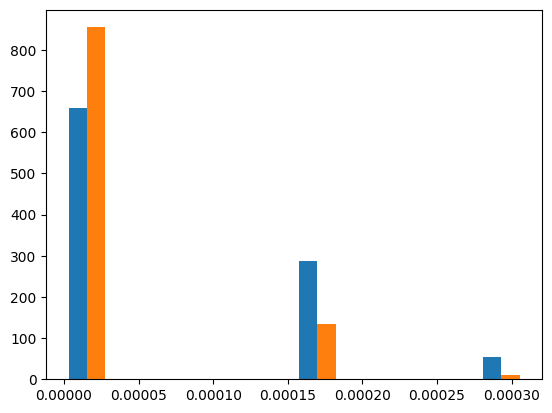

In [67]:
data_m=data.mean(axis=2)
print(data_m.shape)
plt.hist((data[8,0,:]))
plt.show()

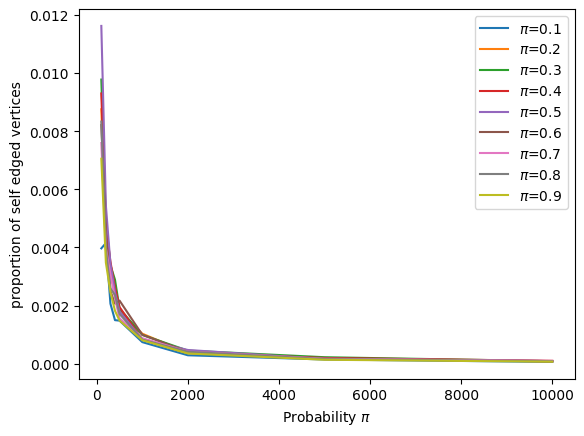

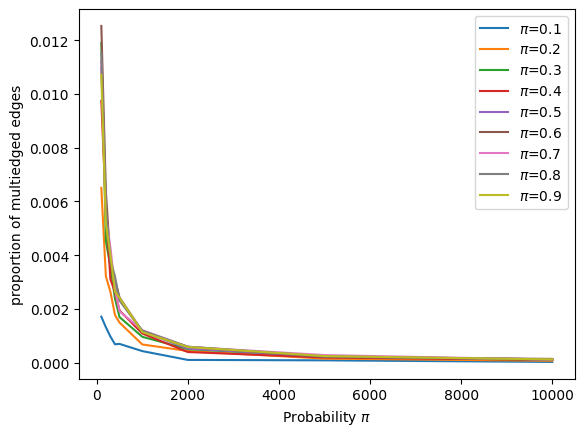

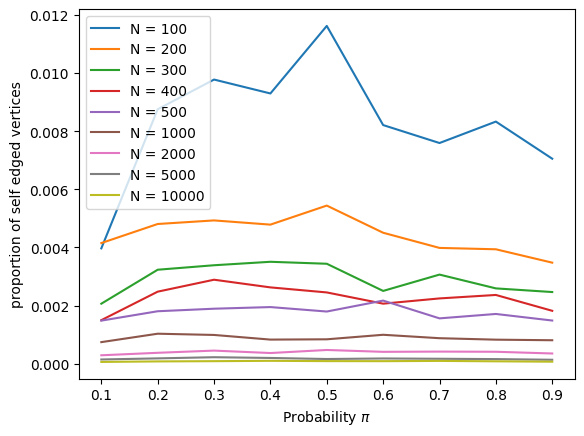

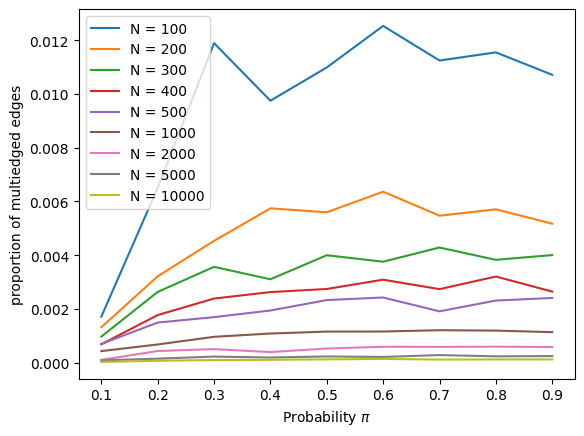

In [68]:
for i in range(9):
    plt.plot(Ns,data_m[:,i,0],label=r"$\pi$="+str(ps[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of self edged vertices")
    plt.legend()
plt.show()
for i in range(9):
    plt.plot(Ns,data_m[:,i,1],label=r"$\pi$="+str(ps[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of multiedged edges")
    plt.legend()
plt.show()

for i in range(9):
    plt.plot(ps,data_m[i,:,0],label="N = "+str(Ns[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of self edged vertices")
    plt.legend()
plt.show()
for i in range(9):
    plt.plot(ps,data_m[i,:,1],label="N = "+str(Ns[i]))
    plt.xlabel(r"Probability $\pi$")
    plt.ylabel("proportion of multiedged edges")
    plt.legend()
plt.show()

# Giant Component Analysis

In [48]:
from giant_component import get_dataset

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

path = "./giant_component/"
N = np.array([100,1000])
P = np.linspace(0,1,500)
core_size = get_dataset(path,10,N,P).mean(-1)
print(core_size.shape)
core_size_100=running_mean(core_size[0], 20)
core_size_1000=running_mean(core_size[1], 20)
P_m =running_mean(P, 20)
print(core_size.shape)

Importing data N=100 ...
Importing data N=1000 ...
(2, 500)
(2, 500)


/tmp/ipykernel_49428/2895964360.py:9: RuntimeWarning: divide by zero encountered in divide
  alpha = 0.5*(1/np.sqrt(p)-1)
/tmp/ipykernel_49428/2895964360.py:10: RuntimeWarning: invalid value encountered in multiply
  return 1-(1-p)*alpha-p*alpha**4


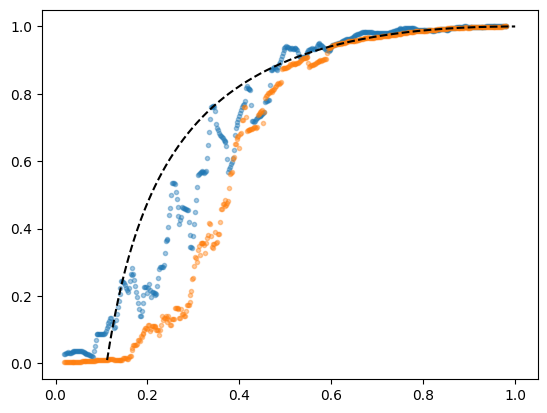

In [49]:
plt.plot(P_m,core_size_100, ".",alpha=.4)
plt.plot(P_m,core_size_1000, ".",alpha=.4)
y = gamma(P)
mask = y > 0
plt.plot(P[mask],y[mask],"k--")
#plt.ylim((-.1,2))
plt.show()

In [58]:
cluster = biggest_component_size(10000,data[0,1,0])
sizes =np.array([len(s) for s in cluster ])
print(test)

[{0, 5824, 6183, 616, 8938, 5073, 3699, 4979, 9621, 1559, 9210, 8253}, {0, 8938}, {5249, 3, 4997, 3654, 6603, 6029, 7445, 6614, 8982, 9945, 8666, 5595, 5918, 4318, 6888, 298, 7211, 7664, 8181, 2998, 5367, 9532}, {7171, 4, 3349, 6421, 3867, 4640, 6689, 4649, 9006, 9518, 6195, 6456, 8248, 9799, 2376, 5194, 9292, 9554, 2131, 347, 4188, 7005, 8542, 6494, 6750, 6495, 5986, 2405, 617, 4714, 7787, 1132, 3181, 6766, 8815, 9841, 8051, 4724, 5492, 9846, 6779, 8060, 6780, 3964, 9858, 6788, 2694, 4747, 910, 7824, 6293, 3479, 3480, 9625, 2970, 7844, 7332, 9892, 9640, 9897, 4781, 5809, 1457, 1203, 436, 7091, 6583, 7096, 4027, 3265, 1218, 7620, 8904, 5322, 2767, 8662, 7130, 6364, 9437, 9440, 9702, 7912, 6890, 7915, 4077, 5615, 1270, 4087, 9721, 5882, 9471}, {4, 4077}, {2944, 2434, 5, 8199, 8458, 9613, 3344, 9233, 2449, 9748, 8866, 4899, 1828, 6564, 8105, 5036, 1968, 9523, 8117, 2999, 7736, 3002, 8124, 6205, 189, 8381, 6206, 833, 5314, 9917, 5566, 6727, 9679, 5073, 2771, 3795, 3027, 6100, 8280, 4186, 

In [60]:
sizes_merged = np.array([len(s) for s in cluster])

In [61]:
print(cluster)

[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 175, 177, 178, 179, 180, 181, 182, 183, 184, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 205, 207, 208, 210, 211, 212, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 2

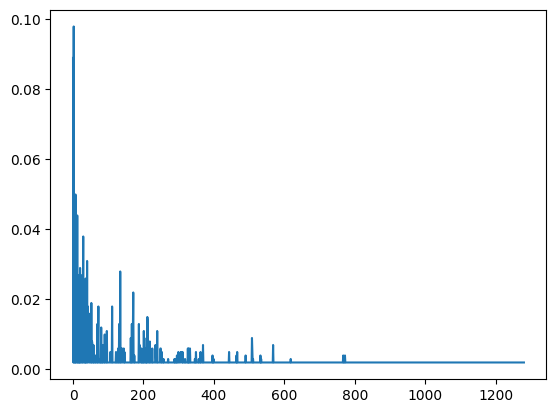

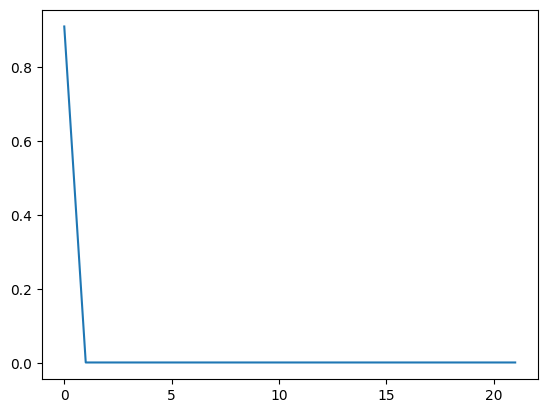

In [63]:
plt.plot(sizes/1000)
plt.show()
plt.plot(sizes_merged/1000)
plt.show()